In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ameo-amcat-dataset/results.xlsx
/kaggle/input/ameo-amcat-dataset/test.xlsx
/kaggle/input/ameo-amcat-dataset/data_description_doc.xlsx
/kaggle/input/ameo-amcat-dataset/Dataset Instructions.pdf
/kaggle/input/ameo-amcat-dataset/train.xlsx


In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("../input/ameo-amcat-dataset/results.xlsx")

In [4]:
df.head()

,ID,Salary
0,664736,NaN
1,1123290,NaN
2,1062444,NaN
3,1072028,NaN
4,267259,NaN


In [5]:
df = pd.read_excel("../input/ameo-amcat-dataset/test.xlsx")

# we are using only train dataset: df_train

In [6]:
df_train = pd.read_excel("../input/ameo-amcat-dataset/train.xlsx")

In [7]:
df_train.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             1500 non-null   object        
 1   ID                     1500 non-null   int64         
 2   Salary                 1500 non-null   object        
 3   DOJ                    1500 non-null   object        
 4   DOL                    1500 non-null   object        
 5   Designation            1500 non-null   object        
 6   JobCity                1500 non-null   object        
 7   Gender                 1500 non-null   object        
 8   DOB                    1500 non-null   datetime64[ns]
 9   10percentage           1500 non-null   float64       
 10  10board                1500 non-null   object        
 11  12graduation           1500 non-null   int64         
 12  12percentage           1500 non-null   float64       
 13  12b

In [9]:
# dropping 1st columns from train dataset
df_train.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df_train

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [11]:
df_train.shape

(3998, 38)

In [12]:
df_train.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [13]:
# all columns have all the data

In [14]:
df_train.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


# Is there a gender bias? in study or earning

In [15]:
df_train.Gender.unique()

array(['f', 'm'], dtype=object)

### Comparing Salary vs Gender

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

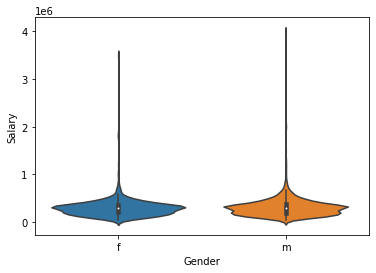

In [16]:
sns.violinplot(x='Gender', y='Salary', data=df_train)

there is an outlier in case of male in salary

### Performance in 10, 12 and class vs gender 

In [17]:
df_train[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


female is performing better in every board(10, 12 and college score) in mean case

Now we will look for median


In [18]:
df_train[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


still female are leading in median wise

### Now we will look for Personality traits in each gender

In [19]:
df_train[['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


across the board females are clearly outscore male

In [20]:
df_train[['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


# Now, Salary vs Gender

In [21]:
df_train[['Salary', 'Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [22]:
df_train[['Salary', 'Gender']].groupby('Gender').median()

,Salary
Gender,
f,300000.0
m,300000.0


In [23]:
print(df_train[['Salary', 'Gender']].groupby("Gender").max())
print(df_train[['Salary', 'Gender']].groupby('Gender').min())

         Salary
Gender         
f       3500000
m       4000000
        Salary
Gender        
f        35000
m        35000


Male are getting better salary according to mean, but using median M&F are paid equally

### Now we will dig more for Gender vs salary
If we find mean of larger than threshold
and if we find mean of lesser than threshold

higher bracket mean it's greater than threshold
lower bracket mean it's lesser than threshold

In [24]:
threshold = df_train.Salary.mean() + df_train.Salary.std()

In [25]:
threshold

520437.34988181875

In [26]:
# adding column of higher bracket
df_train['HighIncome'] = (df_train.Salary > threshold)

In [27]:
df_train['HighIncome']

0       False
1       False
2       False
3        True
4       False
        ...  
3993    False
3994    False
3995    False
3996    False
3997    False
Name: HighIncome, Length: 3998, dtype: bool

finding mean when it will be group using `Gender` and `HighIncome`

In [28]:
df_train[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome', 'Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

Means, feamale are paid more in higherBraacket, and in lowerBracket both r paid same almost